(-3.6337187866811473,
 5.879523465972235,
 -46.083053903185196,
 669.4326102177652)

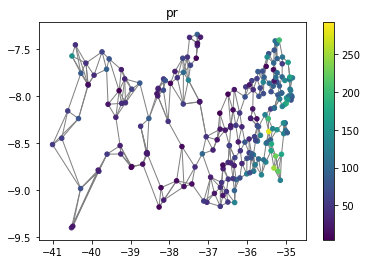

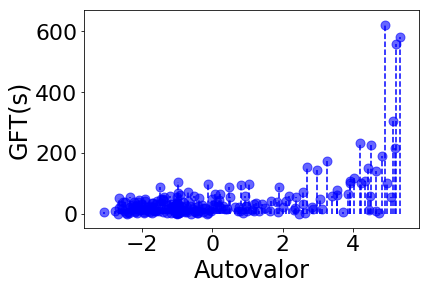

In [43]:
# Desenvolvido em python (jupyter)

#
# Neste código são plotados vértices (coloridos de acordo com o valor do sinal atribuído) e arestas de um grafo bidirecional 
# Cada vértice representa um condado dos EUA e as arestas são ponderadas usando a distância euclideana como parâmetro
# principal. 

# Para que o código funcione é precio instalar as bibliotecas abaixo. 

###
import csv
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from pygsp import *
from gspy import *

###
# Abrindo o arquivo csv com os dados necessários e armazenando os valores numa matriz para trabalhar com os dados no
# código. O arquivo csv neste caso é o baixado diretamente do datausa.io.
columns_signal = defaultdict(list) 

with open('PE_pluviometria.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        for (i,v) in enumerate(row):
            columns_signal[i].append(v)
            

l = len(columns_signal[0])

###
# Abrindo o arquivo csv com os dados necessários e armazenando os valores numa matriz para trabalhar com os dados no
# código. O arquivo csv neste caso contém a identificação, latitude e longitude de cada condado.
columns_coordinates = defaultdict(list) 

with open('Coordenadas_das_estacoes.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        for (i,v) in enumerate(row):
            columns_coordinates[i].append(v)
            

k = len(columns_coordinates[0])

###
# Variável auxiliar usada para indexar corretamente os elementos de B[][]
aux = 0

# Matriz para armazenar os dados desejados. B[][0] contém o FIPS, B[][1] contém a latitude, B[][2] a longitude
# e B[][3] o sinal
B = np.zeros((l,3))

# Processo de busca    
for j in range (0,l):
# Em caso de não existir valor atribuído a um condado, tira-se print do índice do sinal e nada é armazenado em B[][]             
    if (columns_signal[3][j] != '-'):
        B[j][0] = float(columns_coordinates[2][j])
        B[j][1] = float(columns_coordinates[3][j])
        B[j][2] = float(columns_signal[3][j])
    else:
        B[j][0] = float(columns_coordinates[2][j])
        B[j][1] = float(columns_coordinates[3][j])
        B[j][2] = 0.0

###
coords = np.zeros((len(B),2))
s = np.zeros((len(B),1))

for p in range(0,len(B)):
    coords[p][1] = B[p][0]
    coords[p][0] = B[p][1]
    s[p] = B[p][2]

###
# Criando matriz de adjacência usando a biblioteca gspy
###Matriz simétrica
#Matriz de Adjacência K mais próximos
from scipy.spatial import distance
import numpy as np

Adj_K2 = np.zeros((len(B),len(B)))
C = np.zeros((len(B),1))
K = 4
aux = 0

ind=np.zeros((K,1))
for x in range(0,len(B)):
    for y in range(0,len(B)):
        v = [coords[x][0],coords[x][1]]
        w = [coords[y][0],coords[y][1]]
        dst = distance.euclidean(v,w)
        C[y]=dst
    ind = sorted(C)[1:K+1]
    for i in range(0,K):
        ind[i] = np.where(C == ind[i])
    for j in range(0,K):
        aux = ind[j][0]
        Adj_K2[x][int(aux)] = np.exp((-C[ind[j]]**2))
        Adj_K2[int(aux)][x] = Adj_K2[x][int(aux)]

A = Adj_K2
# Definindo o grafo por meio da matriz de adjacência

G = graphs.Graph(A)

# Setando as coordenadas dos nós

G.set_coordinates(coords)

# Plota-se agora os nós nas devidas coordenadas com os respectivos sinais e as arestas ponderadas anteriormente
# por meio da biblioteca gspy

plotting.plot_signal(G, s, vertex_size = 20, plot_name = 'pr',save_as = 'pr')

###
fsize = 24 # plot axis font size
msize = 14 # marker size
csize = fsize - 2 # colorbar label size
graph_node_size = 80

eigvals,V = np.linalg.eig(A)

Vinv = np.linalg.inv(V)

eigval_abs_max = np.max(np.abs(eigvals))

index_eig_sort = np.argsort(np.abs(eigvals - eigval_abs_max))

ss = np.dot(Vinv,s) #GFT

# A GFT é plotada
plt.figure()

stem(eigvals[index_eig_sort],np.abs(ss[index_eig_sort]),fsize=18,msize=8,color='b',linestyle='--',labelstr=0,alph=0.6)

plt.xlabel('Autovalor',fontsize=fsize)
plt.ylabel('GFT(s)',fontsize=fsize)
plt.tick_params(labelsize=fsize-2)
plt.axis('tight')

(-3.6337187866811473, 5.879523465972235, -46.6405989024844, 669.459159979636)

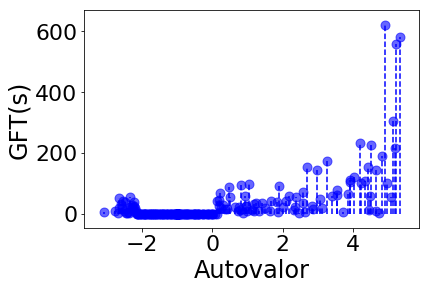

In [44]:
Ik = np.zeros((len(A),len(A)))
k = 100
for i in range(k):
    Ik[i][i] = 1

Pl = np.dot(V,Ik)
Pl = np.dot(Pl,Vinv)

xl = np.dot(Pl,s)

xl_gft = np.dot(Vinv,xl) #GFT

# A GFT é plotada
plt.figure()

stem(eigvals[index_eig_sort],np.abs(xl_gft[index_eig_sort]),fsize=18,msize=8,color='b',linestyle='--',labelstr=0,alph=0.6)

plt.xlabel('Autovalor',fontsize=fsize)
plt.ylabel('GFT(s)',fontsize=fsize)
plt.tick_params(labelsize=fsize-2)
plt.axis('tight')

(-3.6337187866811473,
 5.879523465972235,
 -7.7566199487714975,
 111.33519717537871)

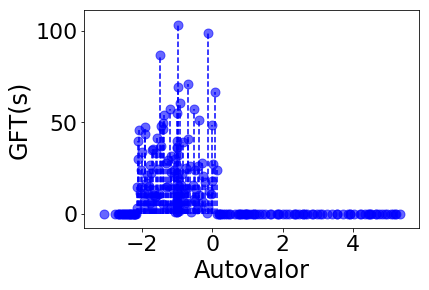

In [45]:
I_n_k = np.zeros((len(A),len(A)))
n_k = len(s) - k
for i in range(n_k):
    I_n_k[k+i][k+i] = 1

Ph = np.dot(V,I_n_k)
Ph = np.dot(Ph,Vinv)

xh = np.dot(Ph,s)

xh_gft = np.dot(Vinv,xh) #GFT

# A GFT é plotada
plt.figure()

stem(eigvals[index_eig_sort],np.abs(xh_gft[index_eig_sort]),fsize=18,msize=8,color='b',linestyle='--',labelstr=0,alph=0.6)

plt.xlabel('Autovalor',fontsize=fsize)
plt.ylabel('GFT(s)',fontsize=fsize)
plt.tick_params(labelsize=fsize-2)
plt.axis('tight')

In [46]:
def optimal_sampling_operator_greedy_algorithm(M,V2):

    import numpy as np
    import operator

    lst = []
    Psi = np.zeros((M,len(V2)))
    a = np.zeros((1,len(V2)))
    b = np.zeros((len(V2),len(V2)))
    V = V2
    
    for j in range(len(V2)):
        a[0,j] = 1
        b[j] = a
        a = np.zeros((1,len(V2)))
    
    k = 0
    while k < M:
        for i in range(len(V2)):
            u, s, vh = np.linalg.svd([V2[i]], full_matrices=True)
            lst.append(np.min(s))

        index, value = max(enumerate(lst), key=operator.itemgetter(1))
        ind = np.where((V == V2[index]).all(axis=1))
        V2 = np.delete(V2, (index), axis=0)
        Psi[k] = b[ind[0]]
        k=k+1
        lst = []
    
    return(Psi)

In [47]:
e = np.where(np.abs(xh_gft) > 0.01)

V2 = V[:, :][:,e[0]]

P = optimal_sampling_operator_greedy_algorithm(len(e[0]),V2)

C = np.dot(P,V2)
C = np.linalg.inv(C)

R = np.dot(V2,C)

xM = np.dot(P,xh) 

x_n = np.dot(R,xM)